In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
time = np.load('eulerian/plots/n1/epochs.npy')
u_error = np.load('eulerian/plots/n1/rbErrors.npy')
w_error = np.load('eulerian/plots/n1/wbErrors.npy')

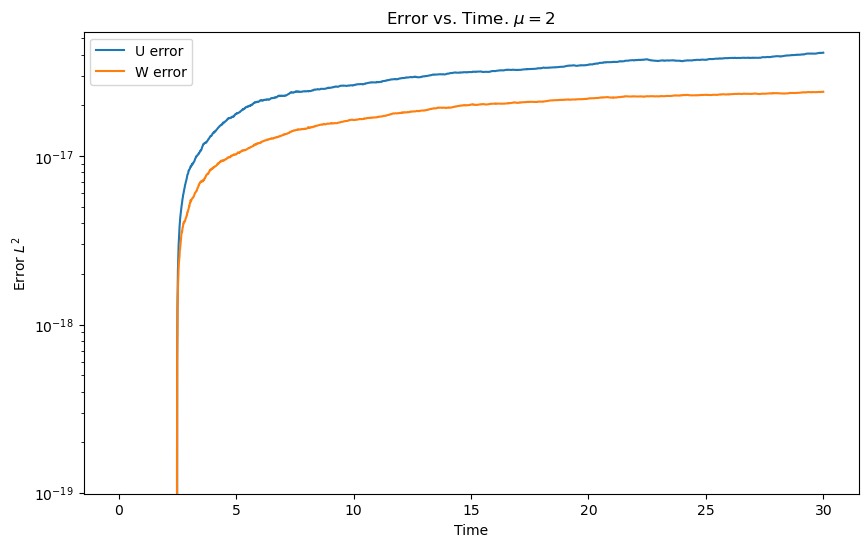

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(time, u_error, label='U error')
plt.semilogy(time, w_error, label='W error')
plt.xlabel('Time')
plt.ylabel('Error $L^2$')
plt.title(r'Error vs. Time. $\mu=2$')
plt.legend()
# plt.grid(True)
plt.show()